In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from tqdm import tqdm
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from ml.models.transfersdataset import TransfersDataset

In [ ]:
from pytrends.request import TrendReq
pytrends = TrendReq()
pytrends.build_payload(kw_list=['Saint-maximin'], timeframe='today 5-y')
interest_over_time_df = pytrends.interest_over_time().reset_index()


In [5]:
data = TransfersDataset(Path.cwd()/'prepped/final-2.csv').data

In [26]:
x = data.marketval_0.sort_values()

In [27]:
x

721       0.2
1173      0.3
1174      0.3
1707      0.3
764       0.3
        ...  
0        96.0
1802    110.0
1804    110.0
1801    180.0
1270    180.0
Name: marketval_0, Length: 2224, dtype: float64

In [24]:
data.marketval_0.rolling(20).mean() - data.marketval_0.rolling(20).std()

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2219    0.188701
2220    0.296112
2221    0.406304
2222    0.406304
2223    0.388723
Name: marketval_0, Length: 2224, dtype: float64

Text(0.5, 0, 'Market value, m')

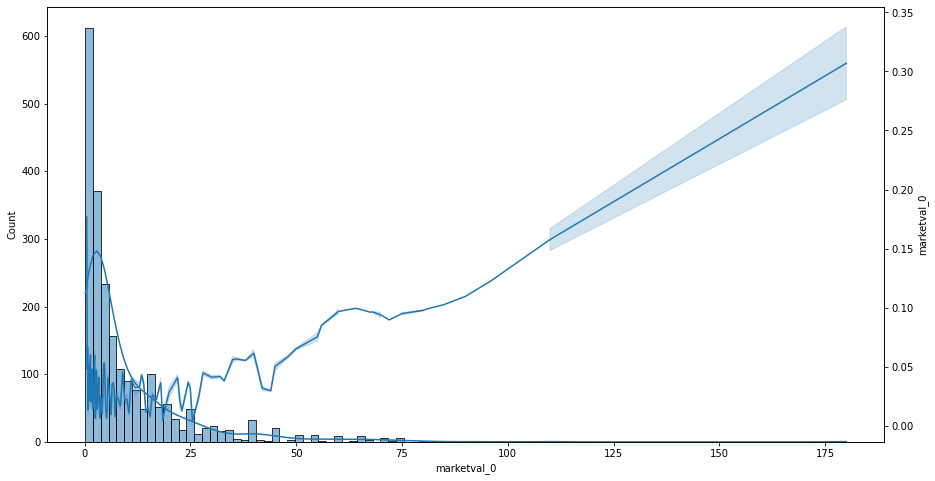

In [37]:
fig, ax1 = plt.subplots(figsize=(15, 8))
ax2 = ax1.twinx()
sns.histplot(x, kde=True, ax=ax1)
sns.lineplot(x = x, y=x.rolling(40).std()/x.rolling(40).mean(), ax=ax2)
plt.xlabel('Market value, m')

In [ ]:
positions = td.data.filter(regex='pos_-', axis=1).apply(lambda col: col.unique()).explode().str.split(', ').explode().dropna().unique()


In [ ]:
mval = {}
for pos in ['ATT', 'MID', 'DEF', 'GK']:
    td = TransfersDataset(Path.cwd()/'prepped/final.csv')
    td.filter_postion(pos)
    mval[pos] = td.data['marketval_0'].mean()

mval = pd.DataFrame.from_dict(mval, orient='index', columns=['avg_mval']).reset_index()
mval

In [ ]:
mval['avg_mval'] /= 10**6

In [ ]:
mval.plot.bar(x='index', y='avg_mval', figsize=(8, 6))
plt.xlabel('Positon')
plt.ylabel('Average market value, M')
plt.show()

In [ ]:
sns.barplot(mval, x='index', y='avg_mval')

In [ ]:
positions

In [ ]:
len(positions)

In [ ]:
d.dtypes.value_counts()

In [ ]:
d.dtypes == np.object0

In [ ]:
d.columns[d.dtypes == np.object0]

In [ ]:
px.line(interest_over_time_df, x='date', y='Saint-maximin', )

In [ ]:
tm = pd.read_csv(Path.cwd()/'prepped/transfers.csv', index_col=False).iloc[:,1:]
tm

In [ ]:
wyscout = pd.read_excel(Path.cwd()/'raw_data/Search results-1.xlsx', index_col=False)
wyscout.columns.tolist()

In [ ]:
' '.join(tm.columns.tolist()) 

In [ ]:
transfers = pd.read_csv(Path.cwd()/'final-3.csv', index_col=False).drop_duplicates()
transfers

In [ ]:
dfs = []
for i in tqdm(range(1, 31)):
    dfs.append(pd.read_excel(Path.cwd()/f'raw_data/Search results-{i}.xlsx'))
    
df = pd.concat(dfs)
    
    

In [ ]:
df

In [ ]:
transfers.columns[transfers.columns.str.contains('t=')].tolist()

In [ ]:
transfers.columns.to_frame().to_csv('ss.csv')

In [ ]:
transfers = transfers.dropna(how='all', subset=transfers.columns[transfers.columns.str.contains('t=')].tolist()).reset_index(drop=True)

In [ ]:
# cols = ['Player',
#  'Team',
#  'League',
#  'Season',
#  'Name',
#  'Full name',
#  'Age',
#  'Left',
#  'Joined',
#  'Fee',
#  'window',
#  'Wyscout name',
#  'Wyscout Joined',
#  'Wyscout Left',]

# transfers = transfers[transfers.columns[[transfers.columns.str.contains('Joined') | transfers.columns.isin(cols)]]]


In [ ]:
transfers.notna().sum().plot(figsize=(20, 20), kind='line', rot=90)
